In [1]:
import h2o
import matplotlib as plt
%matplotlib inline

from h2o.automl import H2OAutoML

import shap


In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_411"; Java(TM) SE Runtime Environment (build 1.8.0_411-b09); Java HotSpot(TM) 64-Bit Server VM (build 25.411-b09, mixed mode)
  Starting server from /Users/fujinhuizi/Desktop/insurance_ml/insurance_ml/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/9r/8c_k_4cj5571k3ct1nx0vtth0000gn/T/tmpcknylpbo
  JVM stdout: /var/folders/9r/8c_k_4cj5571k3ct1nx0vtth0000gn/T/tmpcknylpbo/h2o_fujinhuizi_started_from_python.out
  JVM stderr: /var/folders/9r/8c_k_4cj5571k3ct1nx0vtth0000gn/T/tmpcknylpbo/h2o_fujinhuizi_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 28 days
H2O_cluster_name:,H2O_from_python_fujinhuizi_fcwft0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.769 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [3]:
insurance = h2o.import_file('./data/motor_veh_ins_data_cleaned.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [19]:
insurance.head()

C1,ID,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Payment,Premium,Cost_claims_year,N_claims_year,N_claims_history,R_Claims_history,Type_risk,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight,contract_year,birth_year,driver_age,year_dr_license,year_driving,tenure
0,1,0,4,1,2,1,0,0,222.52,0,0,0,0,1,0,0,2004,80,599,7068,0,P,nan,190,2015,1956,59,1976,39,11
1,1,0,4,1,2,1,0,0,213.78,0,0,0,0,1,0,0,2004,80,599,7068,0,P,nan,190,2015,1956,59,1976,39,11
2,1,0,4,2,2,1,0,0,214.84,0,0,0,0,1,0,0,2004,80,599,7068,0,P,nan,190,2015,1956,59,1976,39,11
3,1,0,4,2,2,1,0,0,216.99,0,0,0,0,1,0,0,2004,80,599,7068,0,P,nan,190,2015,1956,59,1976,39,11
4,2,0,4,2,2,1,0,1,213.7,0,0,0,0,1,0,0,2004,80,599,7068,0,P,nan,190,2017,1956,61,1976,41,13
5,2,0,4,2,2,1,0,1,215.83,0,0,0,0,1,0,0,2004,80,599,7068,0,P,nan,190,2017,1956,61,1976,41,13
6,3,0,15,1,2,1,0,0,380.2,0,0,0,0,3,0,0,2013,85,1229,16030,5,P,3.999,1105,2013,1975,38,1995,18,0
7,3,0,15,1,2,1,0,0,393.5,0,0,0,0,3,0,0,2013,85,1229,16030,5,P,3.999,1105,2013,1975,38,1995,18,0
8,3,0,15,1,2,1,0,0,393.5,0,0,0,0,3,0,0,2013,85,1229,16030,5,P,3.999,1105,2013,1975,38,1995,18,0
9,3,0,15,1,2,1,0,0,395.47,0,0,0,0,3,0,0,2013,85,1229,16030,5,P,3.999,1105,2013,1975,38,1995,18,0


In [5]:
insurance.describe(chunk_summary=True)

Rows:105555
Cols:31

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size      size_percentage
------------  -------------------------  -------  ------------------  --------  -----------------
CBS           Binary                     110      11.0887             58.3 KB   1.28176
CXI           Sparse Integers            21       2.11694             14.3 KB   0.314235
C1N           1-Byte Integers (w/o NAs)  388      39.1129             1.2 MB    28.0461
C1S           1-Byte Fractions           156      15.7258             515.3 KB  11.3301
C2            2-Byte Integers            121      12.1976             788.0 KB  17.3253
C2S           2-Byte Fractions           100      10.0806             652.0 KB  14.3342
C4S           4-Byte Fractions           96       9.67742             1.2 MB    27.3683

Frame distribution summary: 
                 size    number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  ------  ----------------  -----------------------------  ------------------
127.0.0.1:54321  4.4 MB  105555            32                             992
mean             4.4 MB  105555            32                             992
min              4.4 MB  105555            32                             992
max              4.4 MB  105555            32                             992
stddev           0  B    0                 0                              0
total            4.4 MB  105555            32                             992

,C1,ID,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Payment,Premium,Cost_claims_year,N_claims_year,N_claims_history,R_Claims_history,Type_risk,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight,contract_year,birth_year,driver_age,year_dr_license,year_driving,tenure
type,int,int,int,int,int,int,int,int,int,real,real,int,int,real,int,int,int,int,int,int,real,int,enum,real,int,int,int,int,int,int,int
mins,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,40.14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1950.0,0.0,49.0,270.46,0.0,,1.978,43.0,1980.0,1918.0,18.0,1942.0,-13.0,0.0
mean,52777.0,26271.28678887783,0.4664036264306484,6.696603666335086,1.4556487139406002,1.8372317749040785,1.0658424518023777,0.22183695703661604,0.31917957462934016,315.8925572450382,153.55730538581776,0.3946947089195207,2.7517597461039287,0.42519444839183357,2.721803798967363,0.2738951257638198,0.12370801951589219,2004.7280375159864,92.68261096111033,1617.7593671545635,18413.657243238118,4.067898252096064,,4.252007487450906,1191.2624224338015,2013.9729240680215,1969.6536781772545,44.31924589076787,1992.2163516650087,21.756572403012647,9.244886552034485
maxs,105554.0,53502.0,1.0,40.0,17.0,17.0,4.0,7.0,1.0,2993.34,260853.24,25.0,52.0,26.07,4.0,1.0,1.0,2018.0,580.0,7480.0,220675.8,6.0,,8.218,7300.0,2018.0,2000.0,91.0,2018.0,71.0,68.0
sigma,30471.24816938092,15388.30932423726,0.4988724489295172,6.263911499001006,0.928427160517189,1.1555363329005897,0.2678069979196431,0.4648578929729913,0.46616095124788987,140.92796892483148,1477.1123616995972,1.105017816590924,3.8816212271368435,0.7148833434243119,0.6148352019873191,0.4459579239887753,0.3292497113544949,6.7670367498984305,37.01264473256266,604.6973824652188,9135.074234742326,1.5118393670802228,,0.3932200860846368,458.0818335666729,4.061020410956192,12.834068753107289,12.762342663650822,12.488466808197504,12.36468304854704,7.1488713747964745
zeros,1,0,54501,0,0,0,0,84007,71864,0,85909,85909,36596,51910,0,76644,92497,0,1764,0,0,9274,,0,0,0,0,0,0,1102,14729
missing,0,0,3416,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10329,0,0,0,0,0,0,0
0,0.0,1.0,0.0,4.0,1.0,2.0,1.0,0.0,0.0,222.52,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2004.0,80.0,599.0,7068.0,0.0,P,nan,190.0,2015.0,1956.0,59.0,1976.0,39.0,11.0
1,1.0,1.0,0.0,4.0,1.0,2.0,1.0,0.0,0.0,213.78,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2004.0,80.0,599.0,7068.0,0.0,P,nan,190.0,2015.0,1956.0,59.0,1976.0,39.0,11.0
2,2.0,1.0,0.0,4.0,2.0,2.0,1.0,0.0,0.0,214.84,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2004.0,80.0,599.0,7068.0,0.0,P,nan,190.0,2015.0,1956.0,59.0,1976.0,39.0,11.0


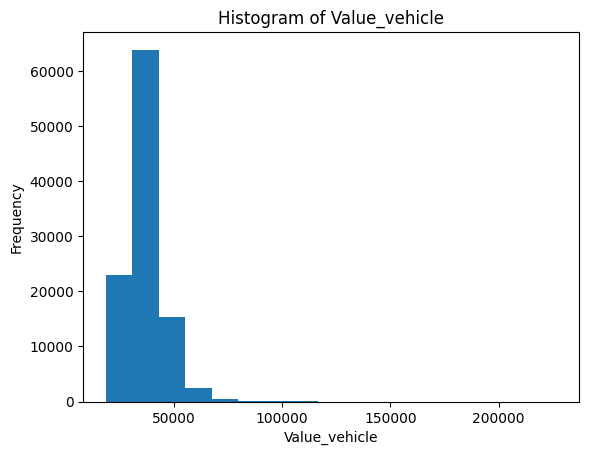

breaks,counts,mids_true,mids,widths
12515.2,nan,nan,nan,nan
24759.9,23017,135.23,18637.6,12244.7
37004.7,63905,6258.5,30882.3,12244.7
49249.4,15364,12380,43127.1,12244.7
61494.2,2445,18502.4,55371.8,12244.7
73738.9,498,24650,67616.5,12244.7
85983.6,194,30778.5,79861.3,12244.7
98228.4,60,38400,92106,12244.7
110473,31,43765.7,104351,12244.7
122718,12,49865,116596,12244.7


In [4]:
insurance["Value_vehicle"].hist()

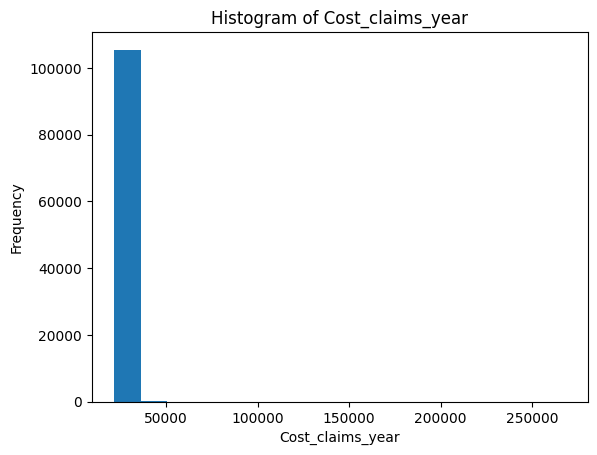

breaks,counts,mids_true,mids,widths
14491.8,nan,nan,nan,nan
28983.7,105478,2126.01,21737.8,14491.8
43475.5,58,7256.62,36229.6,14491.8
57967.4,12,14628,50721.5,14491.8
72459.2,2,24273.4,65213.3,14491.8
86951.1,2,29828.3,79705.2,14491.8
101443,0,0,94197,14491.8
115935,0,0,108689,14491.8
130427,0,0,123181,14491.8
144918,1,64404.9,137673,14491.8


In [5]:
insurance["Cost_claims_year"].hist()

In [18]:
insurance["Cost_claims_year"].describe()

Rows:105555
Cols:1

,Cost_claims_year
type,real
mins,0.0
mean,153.55730538581776
maxs,260853.24
sigma,1477.1123616995972
zeros,85909
missing,0
0,0.0
1,0.0
2,0.0


In [7]:
train, test = insurance.split_frame([0.7], seed=1234)

In [8]:
print("train:%d test:%d" % (train.nrows, test.nrows))

train:73939 test:31616


In [9]:
y = "Cost_claims_year"
# ignore = ["Type_risk", "Area", "Second_driver", "Value_vehicle","Power","N_doors","Type_fuel","Length","Weight"] 
ignore = ["ID", "Premium", "Length", "N_claims_year","birth_year"] 
x = list(set(train.names) - set(ignore))

In [10]:
aml = H2OAutoML(max_models =15,
		seed =12345)

In [11]:
aml.train(x = x, y = y, training_frame = train, validation_frame=test)

AutoML progress: |
17:04:19.488: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████
17:07:17.187: DeepLearning_1_AutoML_1_20240512_170419 [DeepLearning def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for DeepLearning model: DeepLearning_1_AutoML_1_20240512_170419_cv_1.  Details: ERRR on field: _balance_classes: balance_classes requires classification.


████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20240512_170419


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    30                 30                          120275                 15           15           15            192           417           313.367

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 2459501.506347531
RMSE: 1568.2797921122146
MAE: 189.72013878681494
RMSLE: NaN
Mean Residual Deviance: 2459501.506347531

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 947988.6345050802
RMSE: 973.647079030734
MAE: 206.88690955318478
RMSLE: NaN
Mean Residual Deviance: 947988.6345050802

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 2596325.3938711523
RMSE: 1611.3116997872114
MAE: 201.16098103900396
RMSLE: NaN
Mean Residual Deviance: 2596325.3938711523

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
aic                     nan          0            nan           nan           nan           nan           nan
loglikelihood           nan          0            nan           nan           nan           nan           nan
mae                     203.775      11.4571      219.559       211.403       197.135       199.456       191.325
mean_residual_deviance  2.59956e+06  2.59148e+06  5.12704e+06   5.72705e+06   727990        837823        577878
mse                     2.59956e+06  2.59148e+06  5.12704e+06   5.72705e+06   727990        837823        577878
r2                      0.0491414    0.0273602    0.0271972     0.0139026     0.0595574     0.078395      0.0666551
residual_deviance       2.59956e+06  2.59148e+06  5.12704e+06   5.72705e+06   727990        837823        577878
rmse                    1437.23      816.948      2264.3        2393.13       853.223       915.327       760.183
rmsle                   nan          0            nan           nan           nan           nan           nan

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2024-05-12 17:05:01  11.679 sec  0                  1635.94          256.345         2.67631e+06          1012.65            262.282           1.02545e+06
    2024-05-12 17:05:02  12.340 sec  5                  1613.39          226.27          2.60303e+06          988.107            234.176           976355
    2024-05-12 17:05:02  12.638 sec  10                 1598.91          206.912         2.55651e+06          977.125            217.021           954773
    2024-05-12 17:05:02  12.898 sec  15                 1589.76          196.851         2.52732e+06          973.543            209.179           947786
    2024-05-12 17:05:03  13.106 sec  20                 1582.32          191.495         2.50374e+06          972.48             205.998           945717
    2024-05-12 17:05:03  13.320 sec  25                 1574.88          189.888         2.48026e+06          972.693            205.728           946133
    2024-05-12 17:05:03  13.531 sec  30                 1568.28          189.72          2.4595e+06           973.647            206.887           947989

Variable Importances: 
variable              relative_importance    scaled_importance      percentag

In [12]:
aml.leaderboard

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_1_AutoML_1_20240512_170419,1611.31,2.59633e+06,201.161,nan,2.59633e+06
StackedEnsemble_BestOfFamily_1_AutoML_1_20240512_170419,1612.26,2.59937e+06,201.607,nan,2.59937e+06
GBM_grid_1_AutoML_1_20240512_170419_model_6,1613.05,2.60192e+06,198.188,nan,2.60192e+06
StackedEnsemble_AllModels_1_AutoML_1_20240512_170419,1613.34,2.60287e+06,200.105,nan,2.60287e+06
GBM_grid_1_AutoML_1_20240512_170419_model_7,1613.47,2.60328e+06,203.582,nan,2.60328e+06
GBM_grid_1_AutoML_1_20240512_170419_model_4,1613.81,2.60437e+06,201.47,nan,2.60437e+06
GBM_grid_1_AutoML_1_20240512_170419_model_3,1613.85,2.60452e+06,203.595,nan,2.60452e+06
GBM_grid_1_AutoML_1_20240512_170419_model_11,1614.08,2.60524e+06,202.157,nan,2.60524e+06
GBM_grid_1_AutoML_1_20240512_170419_model_5,1615.06,2.60843e+06,201.607,nan,2.60843e+06
GBM_grid_1_AutoML_1_20240512_170419_model_12,1615.14,2.60867e+06,211.448,nan,2.60867e+06


In [13]:
bst_model = aml.leader

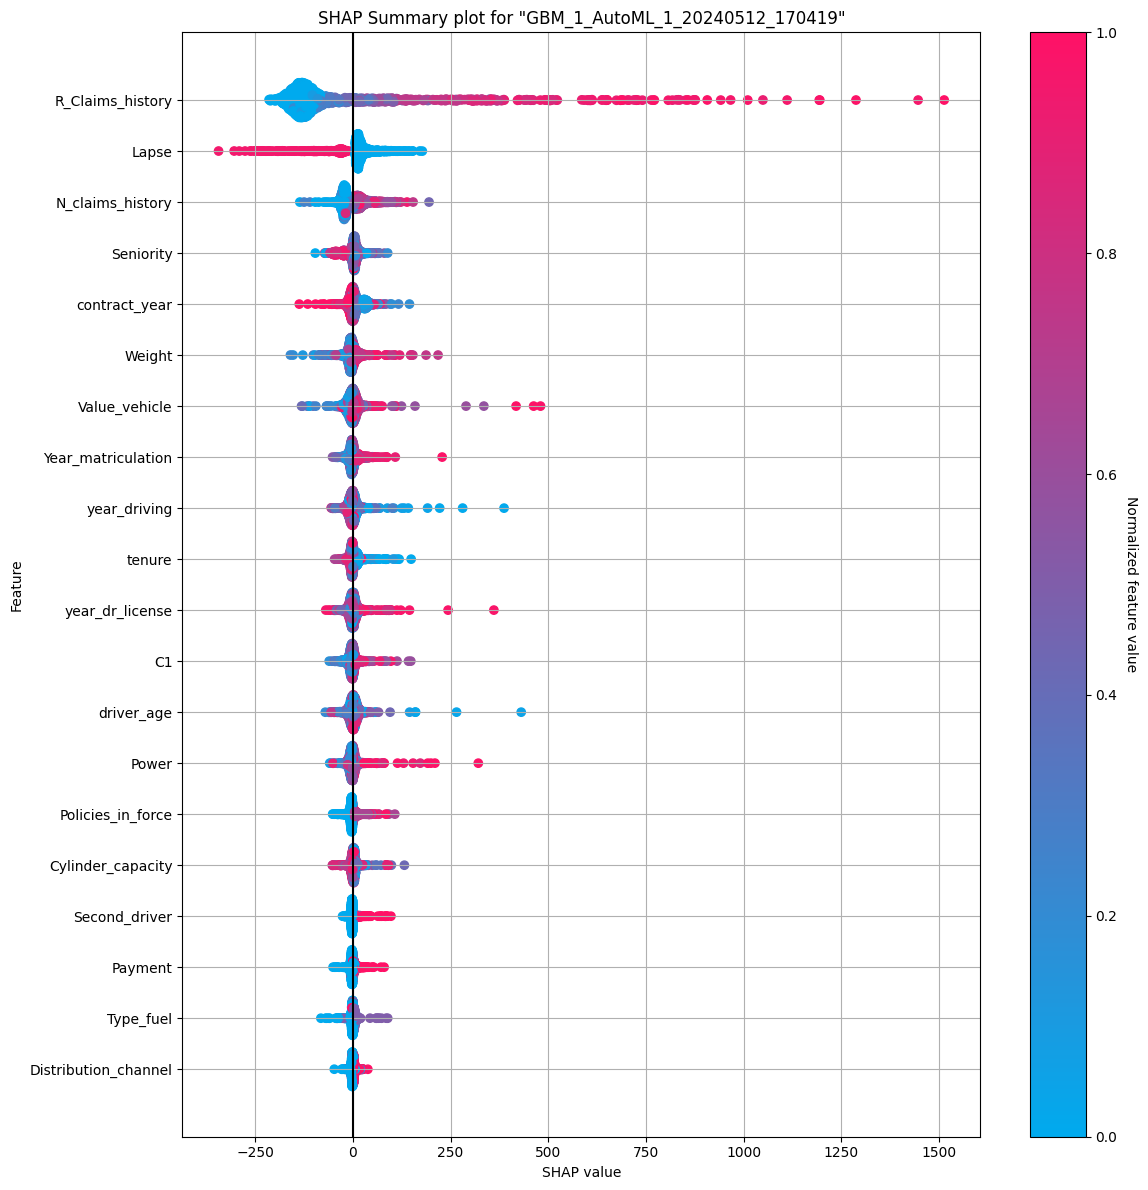

In [16]:
shap_plot = bst_model.shap_summary_plot(test)


In [17]:
h2o_wrapper = H2OProbWrapper(bst_model,feature_names) 

NameError: name 'H2OProbWrapper' is not defined

In [ ]:
explainer = shap.KernelExplainer(h2o_wrapper.predict_binary_prob, X_train.iloc[:100,:])


In [10]:
aml = H2OAutoML(max_models=25, max_runtime_secs_per_model=30, seed=623, project_name='classification', 
                balance_classes=True, class_sampling_factors=[0.5,1.25])
%time aml.train(x=x, y=y, training_frame=train)

AutoML progress: |
22:36:32.333: _train param, Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]

██
22:37:31.4: _train param, Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]

██
22:37:42.988: _train param, Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]


22:37:54.799: _train param, Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]

█████████
22:38:53.671: _train param, Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]

██
22:39:11.367: _train param, Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]

█
22:39:18.136: _train param, Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]

█
22:39:24.872: _train param, Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]

█
22:39:36.230: _train param, Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]

███████████████████
22:42:34.95: _train param, Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]

█
22:42:51.300: _train param, Dropping bad and constant columns: [LO

key,value
Stacking strategy,cross_validation
Number of base models (used / total),18/25
# GBM base models (used / total),5/9
# XGBoost base models (used / total),6/8
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),4/5
# DRF base models (used / total),2/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

In [ ]:
from h2o.automl import get_leaderboard
lb2 = get_leaderboard(aml, extra_columns='ALL')
lb2.head(rows=lb2.nrows)